In [2]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [10]:
conv_base = ResNet50(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

In [11]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [8]:
from keras import models
from keras import layers

In [16]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
'images',
target_size=(150, 150),
batch_size=20,
class_mode='binary')
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=10,)

Found 5 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 5s 488ms/step - loss: 0.1820 - acc: 0.9200
Epoch 2/10
10/10 [==============================] - 4s 373ms/step - loss: 0.0033 - acc: 1.0000
Epoch 3/10
10/10 [==============================] - 4s 353ms/step - loss: 0.0014 - acc: 1.0000
Epoch 4/10
10/10 [==============================] - 4s 358ms/step - loss: 7.4708e-04 - acc: 1.0000
Epoch 5/10
10/10 [==============================] - 4s 354ms/step - loss: 4.8259e-04 - acc: 1.0000
Epoch 6/10
10/10 [==============================] - 4s 373ms/step - loss: 2.2559e-04 - acc: 1.0000
Epoch 7/10
10/10 [==============================] - 4s 388ms/step - loss: 6.8873e-04 - acc: 1.0000
Epoch 8/10
10/10 [==============================] - 4s 408ms/step - loss: 1.7590e-04 - acc: 1.0000
Epoch 9/10
10/10 [==============================] - 4s 394ms/step - loss: 2.3949e-05 - acc: 1.0000
Epoch 10/10
10/10 [==============================] - 4s 367ms/step - loss: 2.7781e

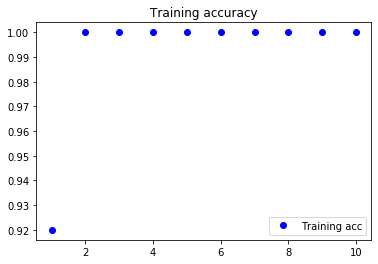

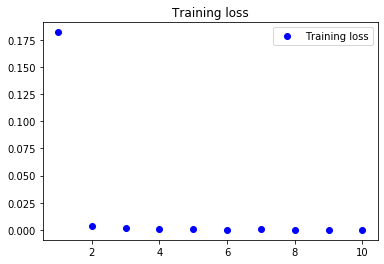

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [75]:
from PIL import Image
import numpy as np

def load_image(path):
    img = Image.open(path)
    img.load()
    img = img.resize((150, 150), PIL.Image.ANTIALIAS)

    data = np.asarray( img, dtype="int32" )
    print(data.shape)
    return data.reshape(1,150,150,3)

In [76]:
data.shape

(150, 112, 3)

In [78]:
model.predict(load_image('test/cat.jpg'))

(150, 150, 3)


array([[0.]], dtype=float32)

In [80]:
model.predict(load_image('test/dog.jpg'))

(150, 150, 3)


array([[0.]], dtype=float32)